# Análisis exploratorio de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='dark')

# Cargando el CSV en un marco de datos
df = pd.read_csv('Data/data_cleaned.csv')

# Organizando los niveles de las variables categóricas ordinales
df['escolaridad_paciente'] = pd.Categorical(df['escolaridad_paciente'], categories=['No tiene', 'Primaria', 'Secundaria'], ordered=True)
df['escolaridad_papa'] = pd.Categorical(df['escolaridad_papa'], categories=['Primaria','Secundaria','Terciaria'], ordered=True)
df['escolaridad_mama'] = pd.Categorical(df['escolaridad_mama'], categories=['Primaria','Secundaria','Terciaria'], ordered=True)
df['q5'] = pd.Categorical(df['q5'], ordered=True)
df['grupo_estudio'] = pd.Categorical(df['grupo_estudio'], categories=sorted(df['grupo_estudio'].unique()), ordered=True)

for i in range(6, 33):
    column_name = 'q' + str(i)
    df[column_name] = pd.Categorical(df[column_name], categories=['No', 'Sí'], ordered=True)

# Display the first few rows of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    28 non-null     int64   
 1   edad                  28 non-null     float64 
 2   sexo                  28 non-null     object  
 3   localidad             28 non-null     object  
 4   estado_civil_padres   28 non-null     object  
 5   q5                    28 non-null     category
 6   escolaridad_mama      28 non-null     category
 7   escolaridad_papa      28 non-null     category
 8   escolaridad_paciente  28 non-null     category
 9   ocupacion_papa        28 non-null     object  
 10  ocupacion_mama        27 non-null     object  
 11  edad_diagnostico_erc  28 non-null     float64 
 12  patologia_base        28 non-null     object  
 13  grupo_estudio         28 non-null     category
 14  q6                    28 non-null     category
 15  q7      

In [2]:
# Run the scripts.py file
%run scripts.py

# Variables sociodemográficas - Pacientes

## Edad

In [3]:
df['edad'].describe().to_frame()

,edad
count,28.000000
mean,12.321429
std,4.846179
min,2.000000
25%,9.750000
50%,13.000000
75%,17.000000
max,18.000000


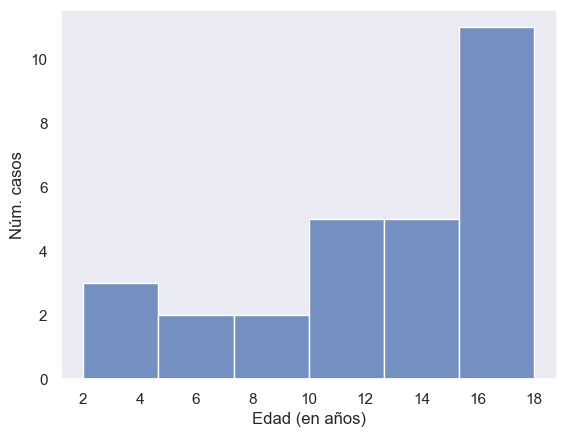

In [4]:
sns.histplot(df['edad'])
plt.ylabel('Núm. casos')
plt.xlabel('Edad (en años)')
plt.show()

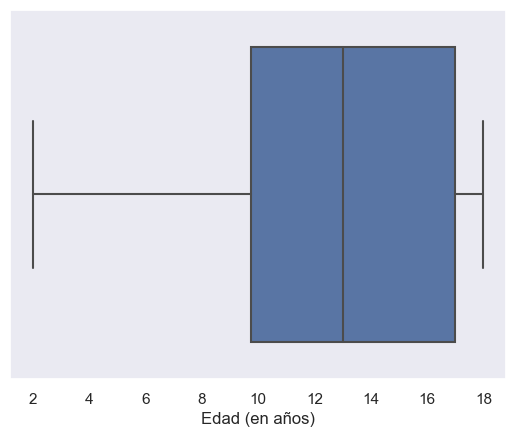

In [5]:
sns.boxplot(x='edad', data=df)
plt.xlabel('Edad (en años)')
plt.show()

## Sexo

In [6]:
create_count_table(df, 'sexo')

,Total,%
Masculino,16,57.0
Femenino,12,43.0


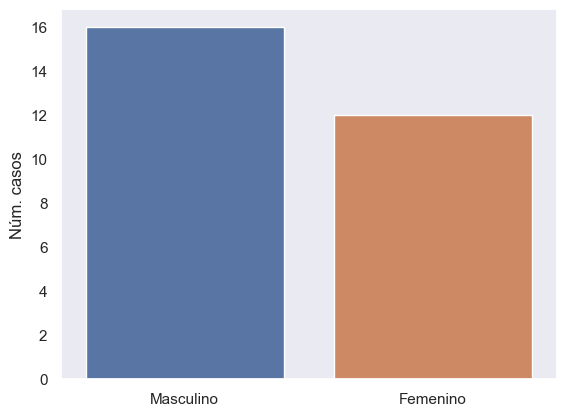

In [7]:
plot_count(df, 'sexo')

## Localidad

In [8]:
create_count_table(df, 'localidad')

,Total,%
Ñemby,2,7.0
San Pedro,2,7.0
Capiata,3,11.0
Santani,3,11.0
Asuncion,2,7.0
Luque,1,4.0
Canindeyu,1,4.0
Horqueta,2,7.0
Ypane,1,4.0
Limpio,2,7.0


## Escolaridad

In [9]:
create_count_table(df, 'escolaridad_paciente')

,Total,%
No tiene,3,11.0
Primaria,13,46.0
Secundaria,12,43.0


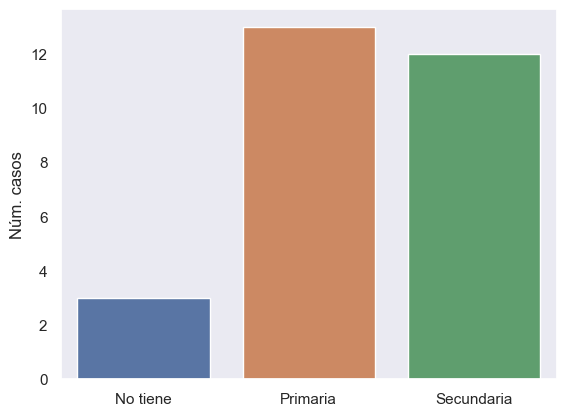

In [10]:
plot_count(df, 'escolaridad_paciente')

## Q5: Número de hijo

In [11]:
create_count_table(df, 'q5')

,Total,%
0,6,21.0
1,7,25.0
2,10,36.0
3,3,11.0
4,2,7.0


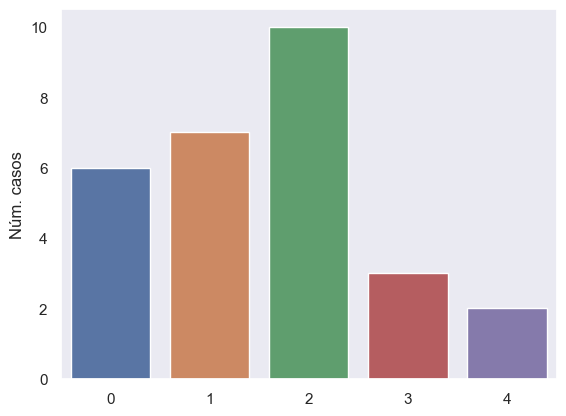

In [12]:
plot_count(df, 'q5')

# Variables sociodemográficas - Padres

## Estado civil

In [13]:
create_count_table(df, 'estado_civil_padres')

,Total,%
Unidos,1,4.0
Casados,13,46.0
Separados,14,50.0


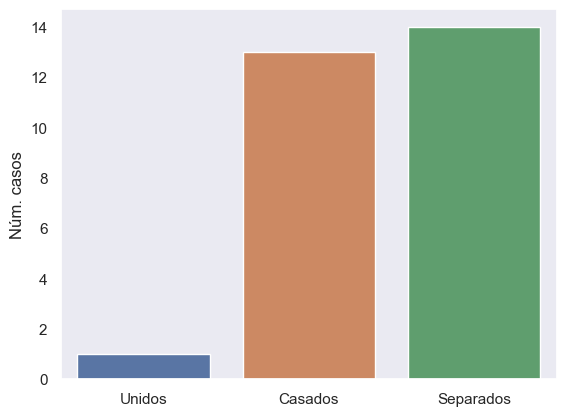

In [14]:
plot_count(df, 'estado_civil_padres')

## Escolaridad del padre

In [15]:
create_count_table(df, 'escolaridad_papa')

,Total,%
Primaria,1,4.0
Secundaria,23,82.0
Terciaria,4,14.0


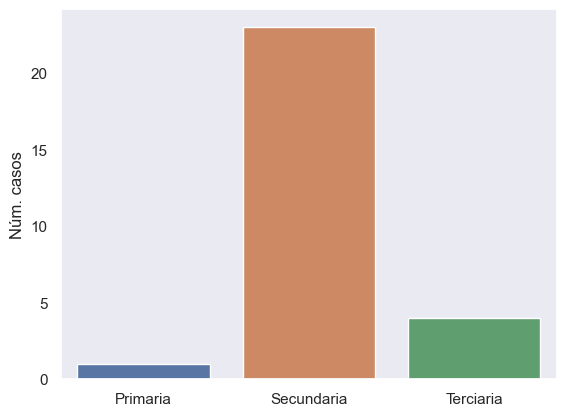

In [16]:
plot_count(df, 'escolaridad_papa')

## Ocupación del padre

In [17]:
create_count_table(df, 'ocupacion_papa')

,Total,%
Empleado,1,4.0
Carpintero,2,7.0
Policia,1,4.0
Empleado privado,8,29.0
Veterinario,1,4.0
Agricultor,3,11.0
Jornalero,5,18.0
Gomero,2,7.0
Diseño grafico,1,4.0
Albañil,1,4.0


## Escolaridad de la madre

In [18]:
create_count_table(df, 'escolaridad_mama')

,Total,%
Primaria,2,7.0
Secundaria,25,89.0
Terciaria,1,4.0


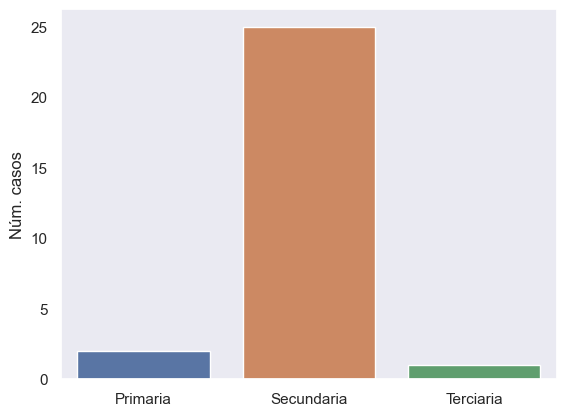

In [19]:
plot_count(df, 'escolaridad_mama')

## Ocupación de la madre

In [20]:
create_count_table(df, 'ocupacion_mama')

,Total,%
Empleada domestica,5,19.0
Ama de casa,16,59.0
Profesora,1,4.0
Empleada privada,2,7.0
Cocinera,1,4.0
Comerciante,1,4.0
Desempleada,1,4.0


# Datos patológicos del paciente

## Edad de diagnóstico de ERC

In [21]:
df['edad_diagnostico_erc'].describe().to_frame().round(1)

,edad_diagnostico_erc
count,28.0
mean,7.5
std,4.6
min,0.5
25%,4.5
50%,7.0
75%,11.2
max,15.0


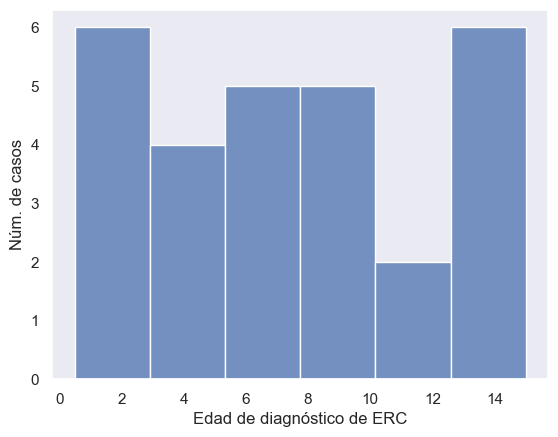

In [22]:
sns.histplot(df['edad_diagnostico_erc'])
plt.xlabel('Edad de diagnóstico de ERC')
plt.ylabel('Núm. de casos')
plt.show()

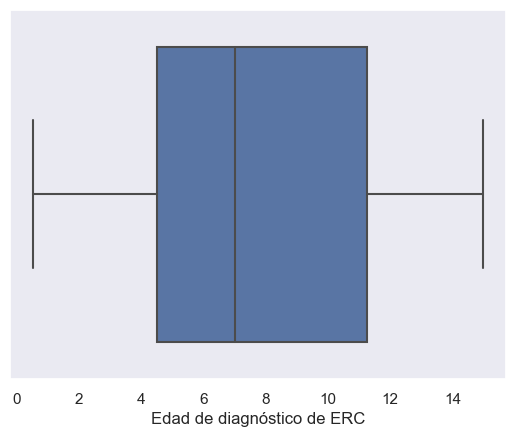

In [23]:
sns.boxplot(data=df, x='edad_diagnostico_erc')
plt.xlabel('Edad de diagnóstico de ERC')
plt.show()

## Patología de base

In [24]:
create_count_table(df, 'patologia_base').sort_values(by='Total', ascending=False)

,Total,%
Cakut,7,25.0
Hipoplasia renal bilateral,7,25.0
Uropatia compleja,5,18.0
Glomeruloesclerosis focal y segmentaria,2,7.0
Vejiga neurogenica,2,7.0
Poliquistosis renal,1,4.0
Sepsis de origen gastrointestinal,1,4.0
Nefropatia iga,1,4.0
Nefropatia c1q,1,4.0
Vasculitis iga,1,4.0


## Grupo de estudio

In [25]:
create_count_table(df, 'grupo_estudio')

,Total,%
A,12,43.0
B,5,18.0
C,11,39.0


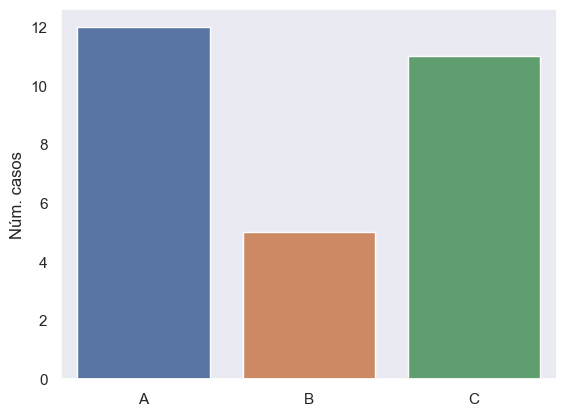

In [26]:
plot_count(df, 'grupo_estudio')

## Q6: ¿Su lenguaje es anormal (retardado, incomprensible, tartamudo)?

In [27]:
create_count_table(df, 'q6')

,Total,%
No,23,82.0
Sí,5,18.0


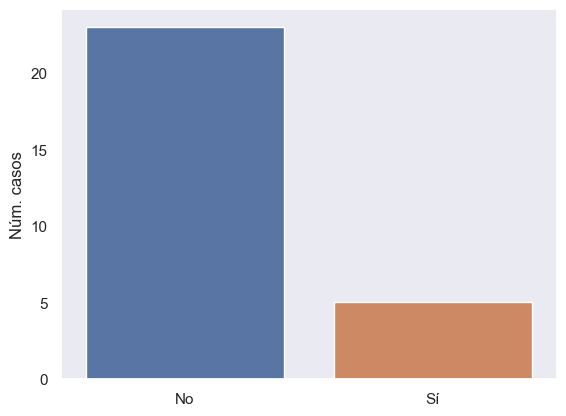

In [28]:
plot_count(df, 'q6')

## Q7: ¿Tiene problemas para dormir?

In [29]:
create_count_table(df, 'q7')

,Total,%
No,24,86.0
Sí,4,14.0


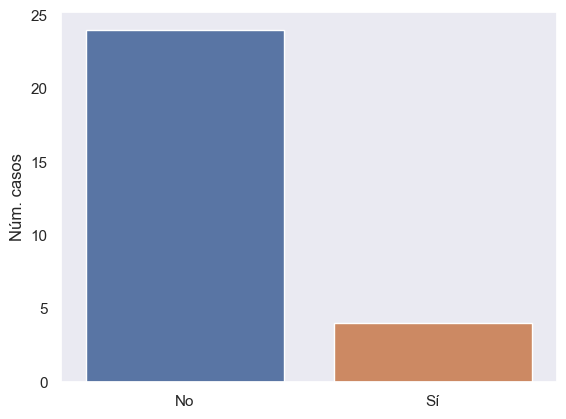

In [30]:
plot_count(df, 'q7')

## Q8: ¿Tiene dolores de cabeza frecuentes?

In [31]:
create_count_table(df, 'q8')

,Total,%
No,25,89.0
Sí,3,11.0


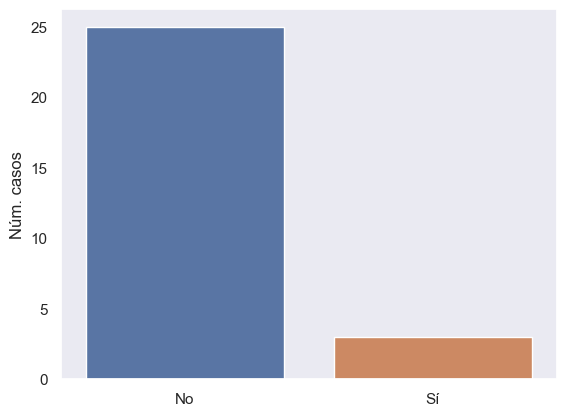

In [32]:
plot_count(df, 'q8')

## Q9: ¿Se fuga de la casa?

In [33]:
create_count_table(df, 'q9')

,Total,%
No,24,86.0
Sí,4,14.0


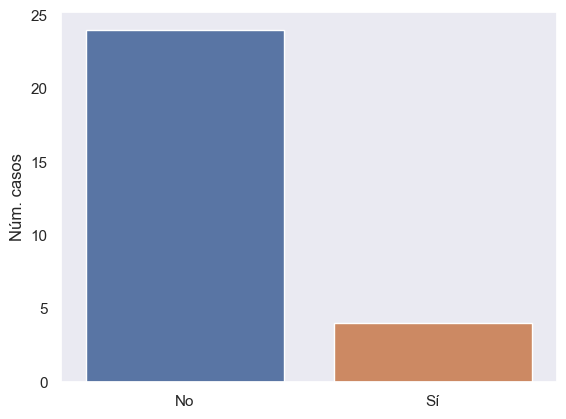

In [34]:
plot_count(df, 'q9')

## Q10: ¿Roba dinero o cosas de la casa o fuera del hogar?

In [35]:
create_count_table(df, 'q10')

,Total,%
No,28,100.0
Sí,0,0.0


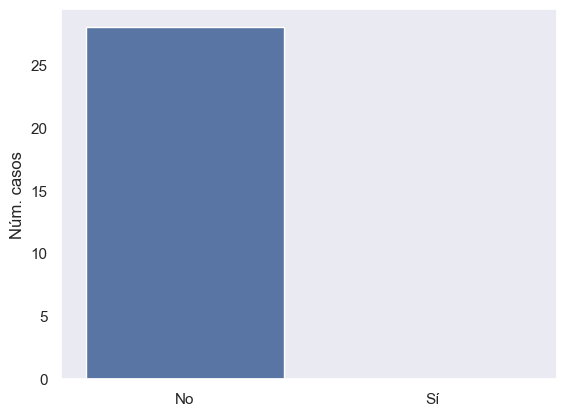

In [36]:
plot_count(df, 'q10')

## Q11: ¿Es muy nervioso(a) o miedoso(a) sin haber una buena razón?

In [37]:
create_count_table(df, 'q11')

,Total,%
No,14,50.0
Sí,14,50.0


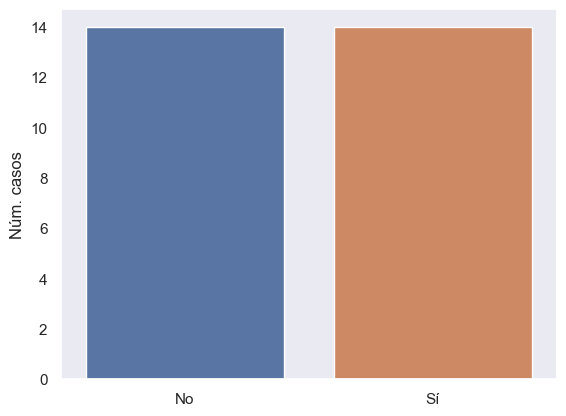

In [38]:
plot_count(df, 'q11')

## Q12: ¿Es lento para aprender en comparación con otros niños/jóvenes?

In [39]:
create_count_table(df, 'q12')

,Total,%
No,16,57.0
Sí,12,43.0


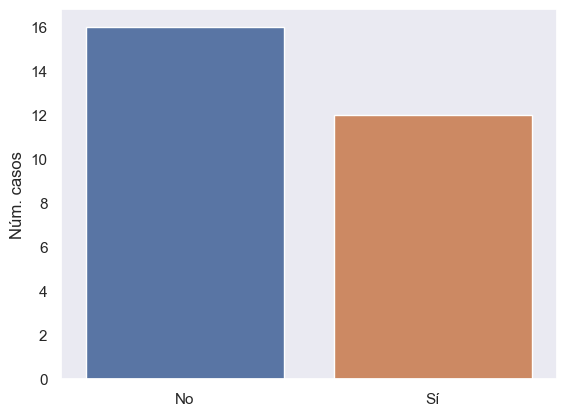

In [40]:
plot_count(df, 'q12')

## Q13: ¿Se aísla y casi nunca juega con otros niños(as)?

In [41]:
create_count_table(df, 'q13')

,Total,%
No,23,82.0
Sí,5,18.0


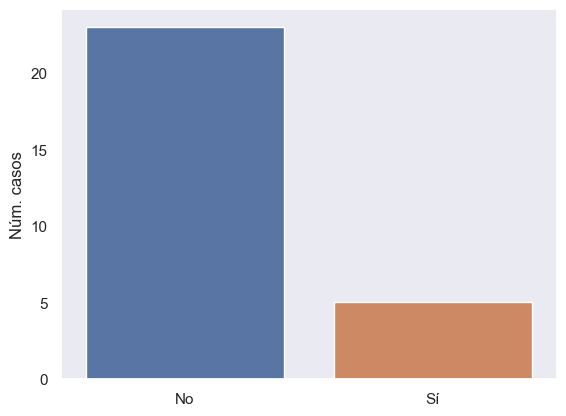

In [42]:
plot_count(df, 'q13')

## Q14: ¿Se orina en la cama a la noche?

In [43]:
create_count_table(df, 'q14')

,Total,%
No,26,93.0
Sí,2,7.0


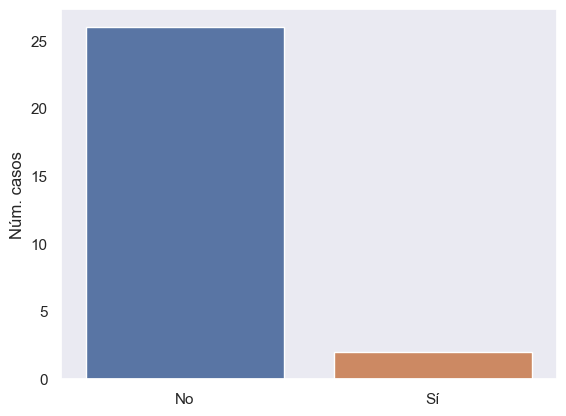

In [44]:
plot_count(df, 'q14')

## Q15: ¿Es demasiado dependiente o apegado a los adultos?

In [45]:
create_count_table(df, 'q15')

,Total,%
No,8,29.0
Sí,20,71.0


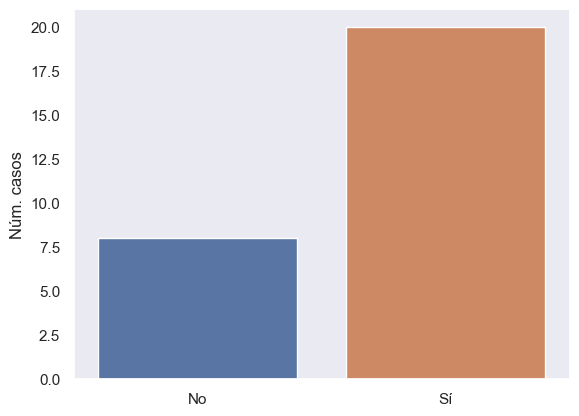

In [46]:
plot_count(df, 'q15')

## Q16: ¿Le da miedo ir a la escuela?

In [47]:
create_count_table(df, 'q16')

,Total,%
No,27,96.0
Sí,1,4.0


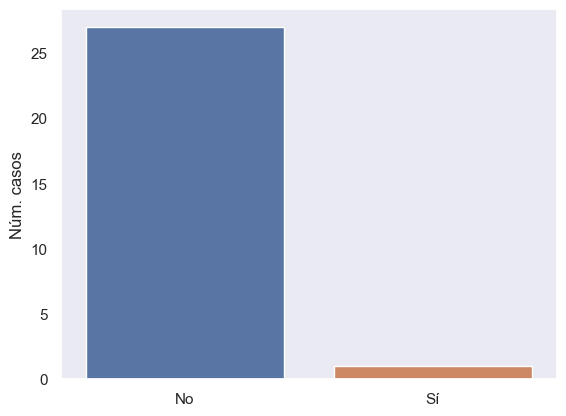

In [48]:
plot_count(df, 'q16')

## Q17: ¿No se puede estar quieto(a) en su asiento y siempre se está moviendo?

In [49]:
create_count_table(df, 'q17')

,Total,%
No,26,100.0
Sí,0,0.0


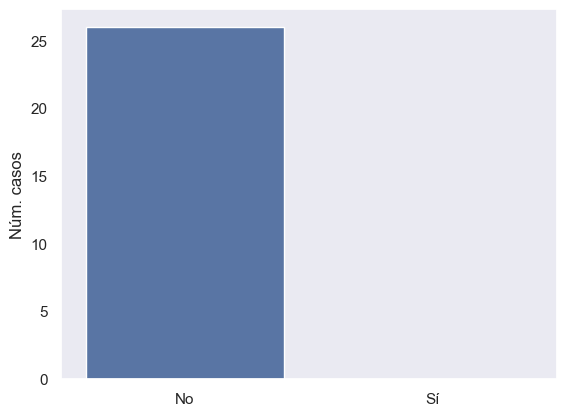

In [50]:
plot_count(df, 'q17')

## Q18: ¿No termina lo que empieza, es muy distraído(a)?

In [51]:
create_count_table(df, 'q18')

,Total,%
No,22,100.0
Sí,0,0.0


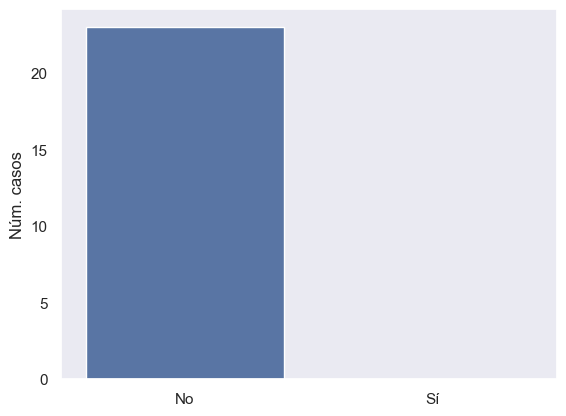

In [52]:
plot_count(df, 'q19')

## Q19: ¿Muchas veces está de mal humor, es irritable y geniudo?

In [53]:
create_count_table(df, 'q19')

,Total,%
No,23,100.0
Sí,0,0.0


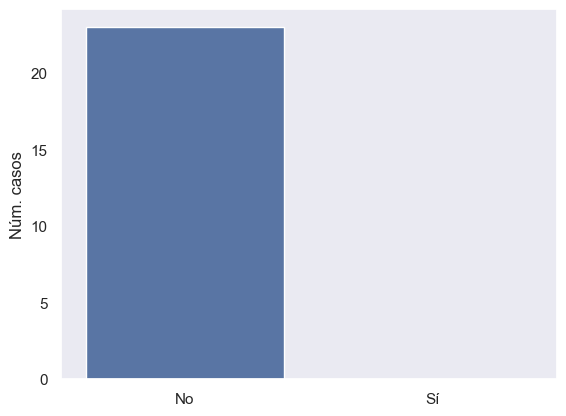

In [54]:
plot_count(df, 'q19')

## Q20: ¿Muchas veces se le ve triste, infeliz o deprimido?

In [55]:
create_count_table(df, 'q20')

,Total,%
No,23,100.0
Sí,0,0.0


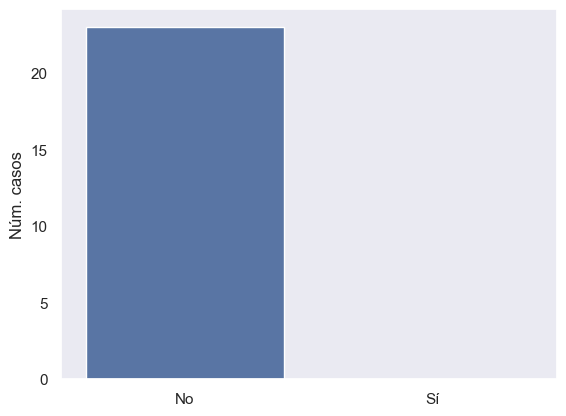

In [56]:
plot_count(df, 'q20')

## Q21: ¿Se queja de dolores o molestias físicas sin que haya problema médico?

In [57]:
create_count_table(df, 'q21')

,Total,%
No,24,86.0
Sí,4,14.0


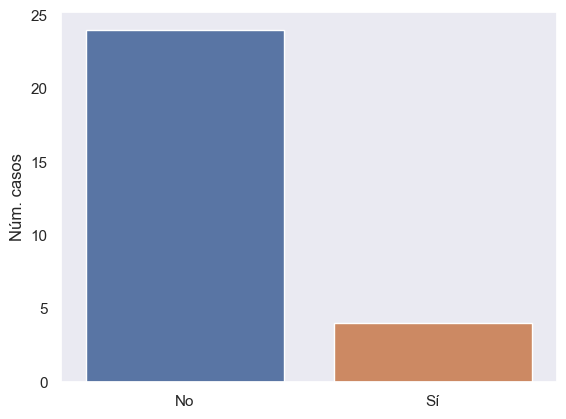

In [58]:
plot_count(df, 'q21')

## Q22: ¿Tiene pesadillas con frecuencia?

In [59]:
create_count_table(df, 'q22')

,Total,%
No,25,89.0
Sí,3,11.0


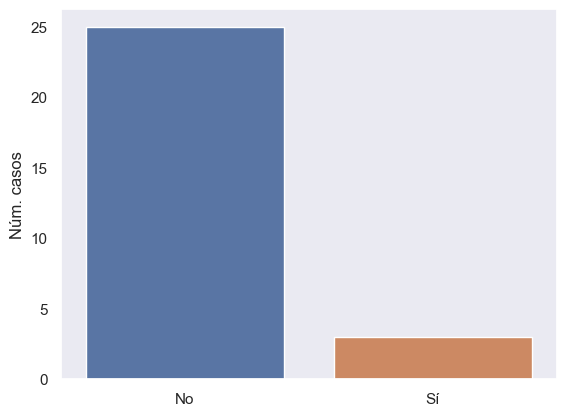

In [60]:
plot_count(df, 'q22')

## Q23: ¿Tiene bajo peso porque rechaza la comida?

In [61]:
create_count_table(df, 'q23')

,Total,%
No,25,89.0
Sí,3,11.0


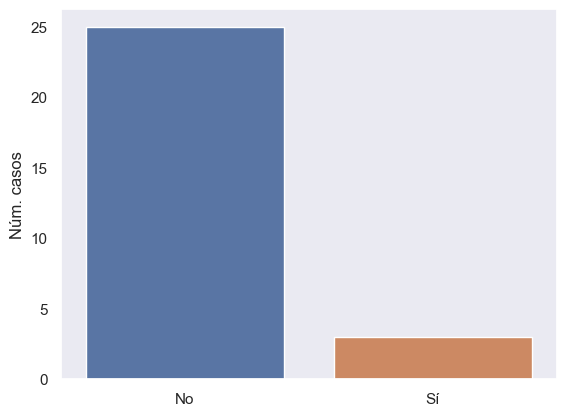

In [62]:
plot_count(df, 'q23')

## Q24: ¿Come demasiado y tiene sobrepeso?

In [63]:
create_count_table(df, 'q24')

,Total,%
No,25,89.0
Sí,3,11.0


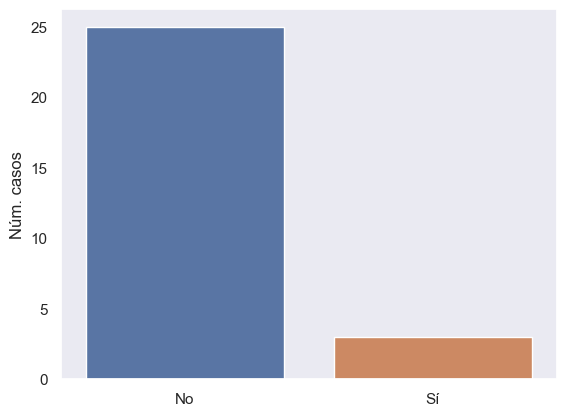

In [64]:
plot_count(df, 'q24')

## Q25: ¿Es muy desobediente o peleonero(a)?

In [65]:
create_count_table(df, 'q25')

,Total,%
No,17,61.0
Sí,11,39.0


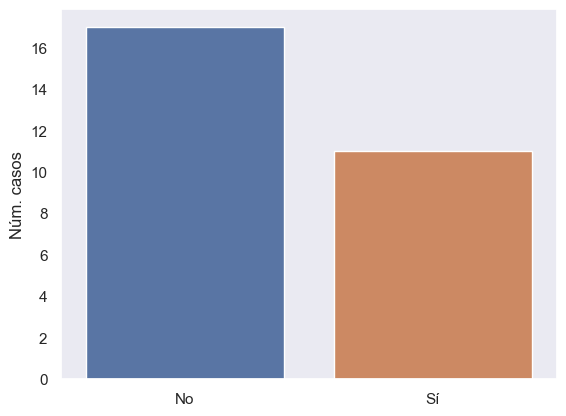

In [66]:
plot_count(df, 'q25')

## Q26: ¿Dice muchas mentiras?

In [67]:
create_count_table(df, 'q26')

,Total,%
No,20,71.0
Sí,8,29.0


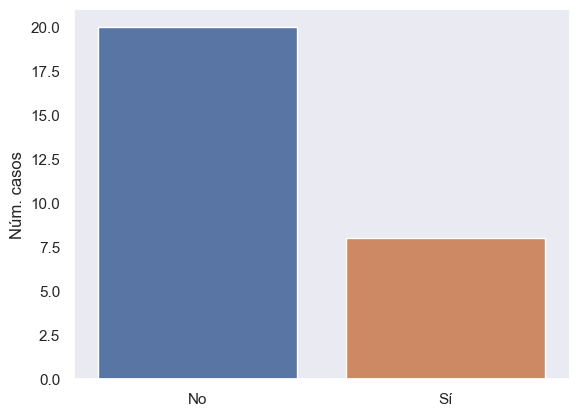

In [68]:
plot_count(df, 'q26')

## Q27: ¿Se niega a trabajar en la escuela?

In [69]:
create_count_table(df, 'q27')

,Total,%
No,27,96.0
Sí,1,4.0


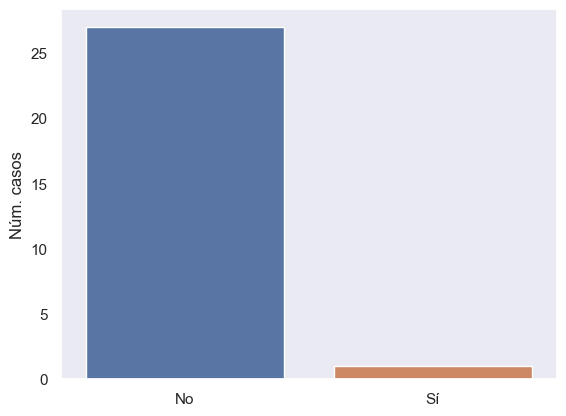

In [70]:
plot_count(df, 'q27')

## Q28: ¿Es muy explosivo(a), pierde el control con facilidad?

In [71]:
create_count_table(df, 'q28')

,Total,%
No,19,68.0
Sí,9,32.0


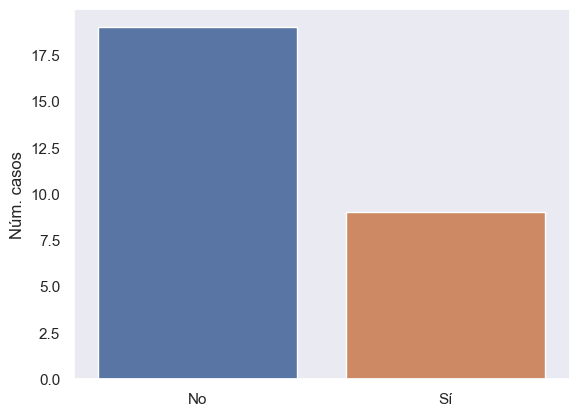

In [72]:
plot_count(df, 'q28')

## Q29: ¿Padece de ataques (convulsiones) o caídas al piso sin razón?

In [73]:
create_count_table(df, 'q29')

,Total,%
No,21,75.0
Sí,7,25.0


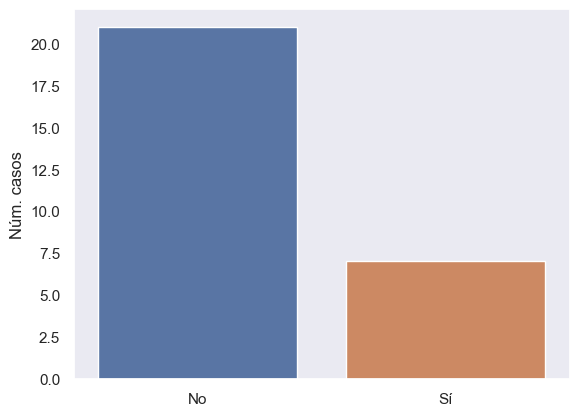

In [74]:
plot_count(df, 'q29')

## Q30: ¿Se queda mirando al vacío (se queda en babia)?

In [75]:
create_count_table(df, 'q30')

,Total,%
No,15,54.0
Sí,13,46.0


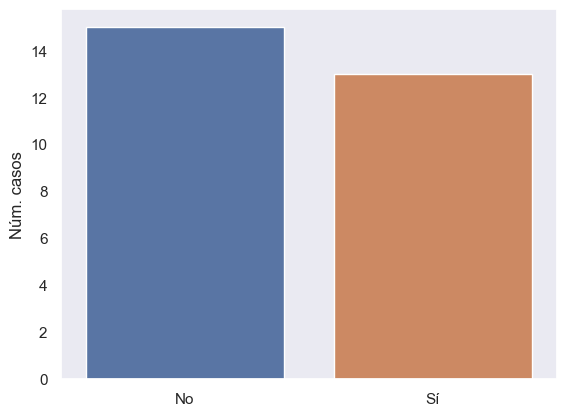

In [76]:
plot_count(df, 'q30')

## Q31: ¿Se junta con niños(as)/muchachos(as) que se meten en problemas?

In [77]:
create_count_table(df, 'q31')

,Total,%
No,22,79.0
Sí,6,21.0


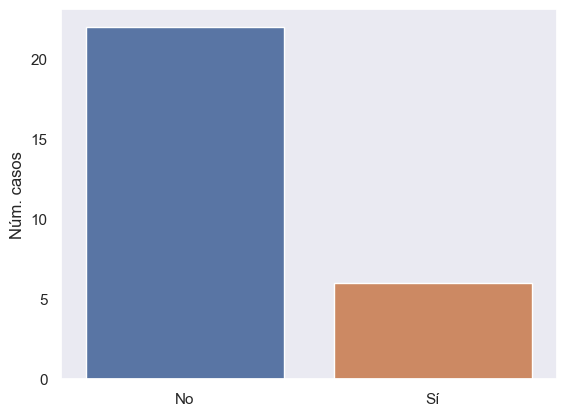

In [78]:
plot_count(df, 'q31')

## Q32: ¿Toma alcohol o usa drogas?

In [79]:
create_count_table(df, 'q32')

,Total,%
No,26,93.0
Sí,2,7.0


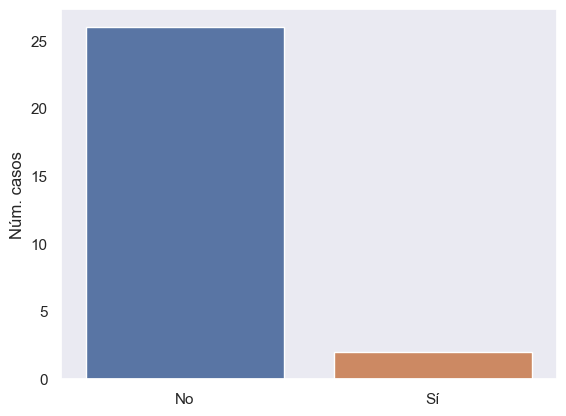

In [80]:
plot_count(df, 'q32')